# Import Library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Read Dataset

In [5]:
# baca dataset
df = pd.read_csv("ai_ghibli_trend_dataset_v2.csv")
df

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
0,77ce5c72-eb45-4651-bcb1-c0677c0fceaf,6a7adf3d,Studio Ghibli-inspired ocean with giant fish,916,410,555,Reddit,4.80,49,1684,1024x1024,89,Yes,Yes,2025-03-11,"So nostalgic, feels like childhood memories. 🎥..."
1,7d66c67f-0d11-4ef9-895c-d865ef11fe40,523b8706,Ghibli-style village at sunset,2965,1361,417,Reddit,11.11,81,2808,1024x1024,92,Yes,No,2025-03-11,Absolutely stunning! Love the details. 🎨 #5729
2,d7978afd-3932-4cce-9a21-5f9bf2bc1f64,0e02592a,A lone traveler exploring an enchanted ruin,4727,655,785,Instagram,5.56,41,1800,2048x2048,61,No,No,2025-03-06,Is this AI or hand-painted? Incredible! #8001
3,cb34636a-a15c-4b15-999c-759dbb8896fe,9ed78a42,Spirited Away-style bustling market street,1629,1954,212,TikTok,12.45,88,479,2048x2048,76,No,No,2025-03-23,Is this AI or hand-painted? Incredible! #5620
4,7511fbb8-db05-4584-a3a4-e8bb525ed58b,69ec8f02,Magical Ghibli forest with floating lanterns,2573,1281,913,TikTok,4.80,64,1789,512x512,58,No,Yes,2025-03-06,This looks straight out of a Ghibli movie! 🌟 #...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,135267ba-3941-42ae-a421-3be20e3856d1,c80e6866,Anime-style train passing through a fantasy world,1634,1328,624,TikTok,10.56,73,3255,1024x1024,96,Yes,Yes,2025-03-20,I can't believe this is AI-generated! 😲 #3419
496,b2ced831-5b08-403d-bfb3-b562e256f359,81669630,Serene meadow with a tiny spirit creature,4198,833,812,Reddit,8.41,89,4710,1024x1024,83,Yes,No,2025-03-28,The lighting and atmosphere are perfect. 💡 #3348
497,8c87b8aa-b304-43cf-82b3-3a199367ec17,258613ea,Ghibli-style mountain with floating islands,1237,1703,530,Reddit,12.05,86,1545,2048x2048,81,Yes,No,2025-03-16,The lighting and atmosphere are perfect. 💡 #5209
498,04dba0f4-fdb7-4341-8bb6-dca5a595cd81,23b56439,"Cozy tea shop in a mystical town, Ghibli style",1852,1158,259,Twitter,5.86,56,2796,512x512,78,Yes,No,2025-03-01,Is this AI or hand-painted? Incredible! #1163


In [6]:
# Info dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Cek nilai kosong


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               500 non-null    object 
 1   user_id                500 non-null    object 
 2   prompt                 500 non-null    object 
 3   likes                  500 non-null    int64  
 4   shares                 500 non-null    int64  
 5   comments               500 non-null    int64  
 6   platform               500 non-null    object 
 7   generation_time        500 non-null    float64
 8   gpu_usage              500 non-null    int64  
 9   file_size_kb           500 non-null    int64  
 10  resolution             500 non-null    object 
 11  style_accuracy_score   500 non-null    int64  
 12  is_hand_edited         500 non-null    object 
 13  ethical_concerns_flag  500 non-null    object 
 14  creation_date          500 non-null    object 
 15  top_co

# Handling Missing Value

In [7]:
# Cek nilai kosong
print("Jumlah Missing Value per Kolom:")
print(df.isnull().sum())

# Isi nilai kosong numerik dengan median
df.fillna(df.median(numeric_only=True), inplace=True)

Jumlah Missing Value per Kolom:
image_id                 0
user_id                  0
prompt                   0
likes                    0
shares                   0
comments                 0
platform                 0
generation_time          0
gpu_usage                0
file_size_kb             0
resolution               0
style_accuracy_score     0
is_hand_edited           0
ethical_concerns_flag    0
creation_date            0
top_comment              0
dtype: int64


# Visualisasi Data

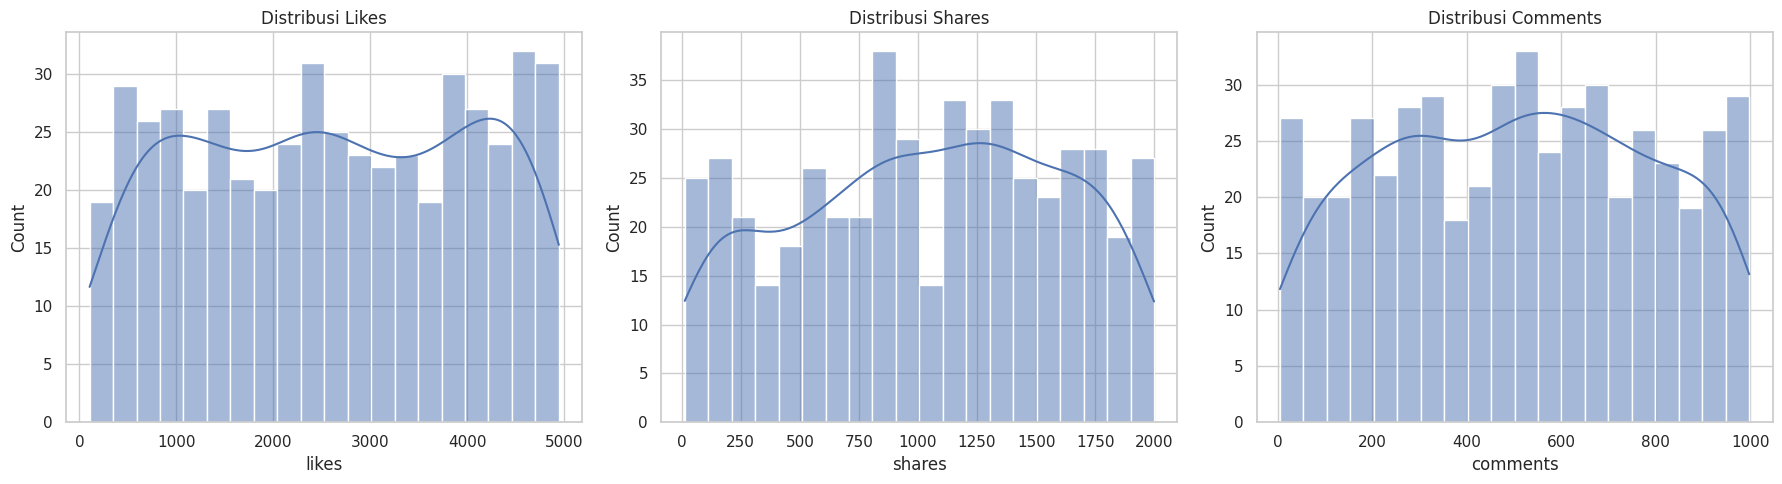

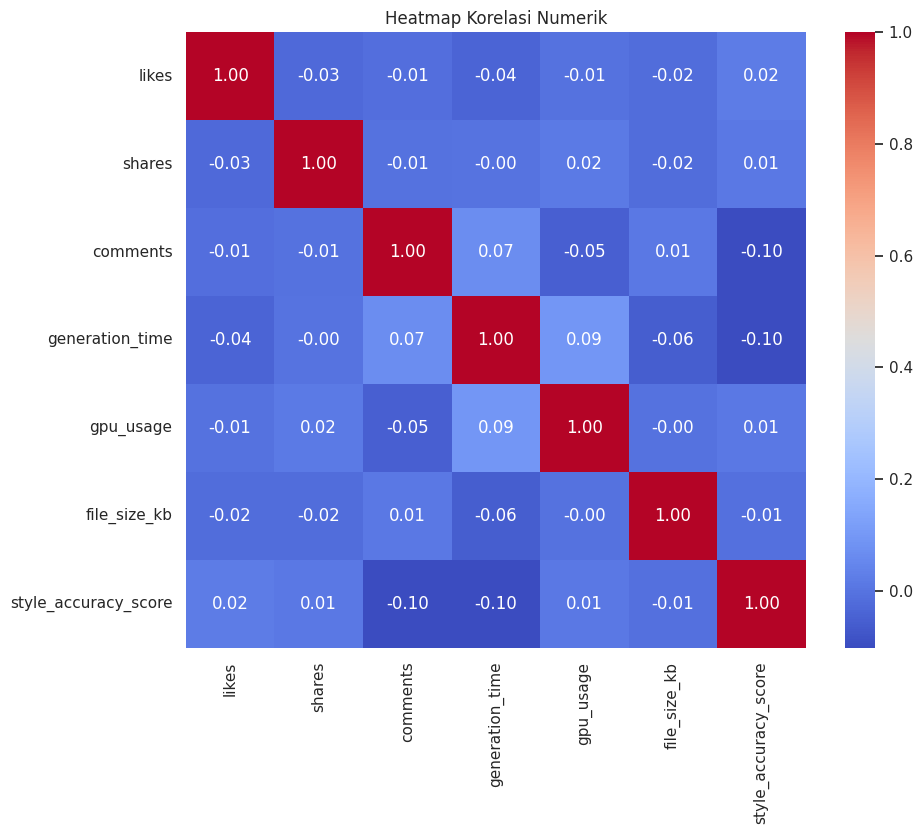

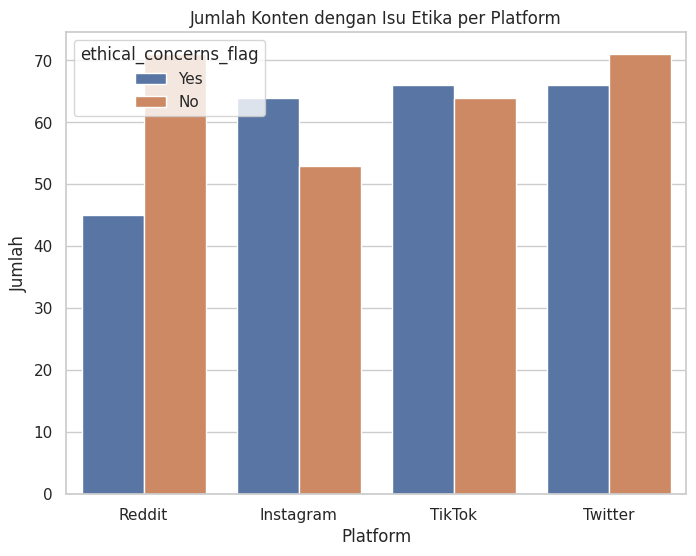

In [8]:
sns.set(style="whitegrid")

# Distribusi Likes, Shares, Comments
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['likes'], bins=20, ax=axs[0], kde=True).set_title("Distribusi Likes")
sns.histplot(df['shares'], bins=20, ax=axs[1], kde=True).set_title("Distribusi Shares")
sns.histplot(df['comments'], bins=20, ax=axs[2], kde=True).set_title("Distribusi Comments")
plt.tight_layout()
plt.show()

# Korelasi numerik
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Numerik")
plt.show()

# Platform vs Ethical Concern
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='platform', hue='ethical_concerns_flag')
plt.title("Jumlah Konten dengan Isu Etika per Platform")
plt.xlabel("Platform")
plt.ylabel("Jumlah")
plt.show()


# Train the Model

In [9]:
df_ml = df.copy()

# Label Encoding
le = LabelEncoder()
df_ml['ethical_concerns_flag'] = le.fit_transform(df_ml['ethical_concerns_flag'])  # Yes=1, No=0
df_ml['platform'] = le.fit_transform(df_ml['platform'])
df_ml['is_hand_edited'] = le.fit_transform(df_ml['is_hand_edited'])

# Fitur dan Target
features = ['likes', 'shares', 'comments', 'generation_time', 'gpu_usage',
            'file_size_kb', 'style_accuracy_score', 'platform', 'is_hand_edited']
X = df_ml[features]
y = df_ml['ethical_concerns_flag']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
nb_model = GaussianNB()
tree_model = DecisionTreeClassifier(random_state=42)

nb_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Predict & Evaluate

Naive Bayes Accuracy: 0.52
Decision Tree Accuracy: 0.41

Naive Bayes Classification Report:
              precision    recall  f1-score   support

  No Concern       0.48      0.69      0.56        45
     Concern       0.60      0.38      0.47        55

    accuracy                           0.52       100
   macro avg       0.54      0.54      0.52       100
weighted avg       0.54      0.52      0.51       100


Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Concern       0.38      0.47      0.42        45
     Concern       0.45      0.36      0.40        55

    accuracy                           0.41       100
   macro avg       0.41      0.42      0.41       100
weighted avg       0.42      0.41      0.41       100



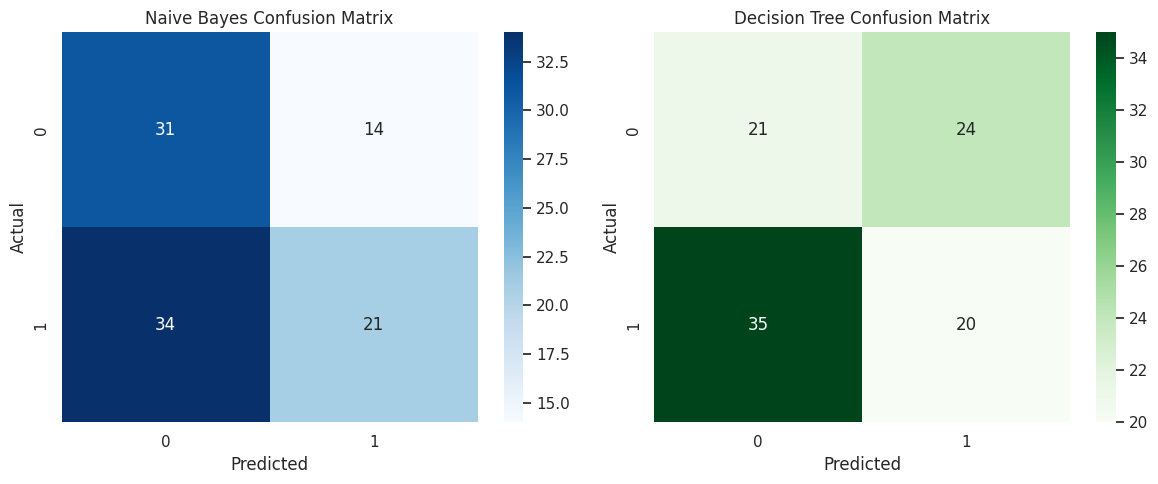

In [10]:
nb_preds = nb_model.predict(X_test)
tree_preds = tree_model.predict(X_test)

# Evaluasi akurasi dan laporan
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_preds, target_names=["No Concern", "Concern"]))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_preds, target_names=["No Concern", "Concern"]))

# Confusion Matrix Visual
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title("Naive Bayes Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, tree_preds), annot=True, fmt="d", cmap="Greens", ax=axs[1])
axs[1].set_title("Decision Tree Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()